In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization import plot_histogram
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
backend = Aer.get_backend('statevector_simulator')
backendQASM = provider.get_backend('ibmq_qasm_simulator')
backendREAL = provider.get_backend('ibmq_london')


# ZAD 1

In [2]:
circ1 = QuantumCircuit(3,2)
circ2 = QuantumCircuit(3,2)
circ3 = QuantumCircuit(3,2)

circ1.h(2)
#inc
circ1.ccx(2,1,0)
circ1.cx(2,1)
circ1.barrier()
#dec
circ1.x(1)
circ1.x(2)
circ1.ccx(2,1,0)
circ1.x(1)
circ1.cx(2,1)
circ1.x(2)
circ1.barrier()

#step 2
circ2.h(2)
#inc
circ2.ccx(2,1,0)
circ2.cx(2,1)
circ2.barrier()
#dec
circ2.x(1)
circ2.x(2)
circ2.ccx(2,1,0)
circ2.x(1)
circ2.cx(2,1)
circ2.x(2)
circ2.barrier()

circ2.h(2)
#inc
circ2.ccx(2,1,0)
circ2.cx(2,1)
circ2.barrier()
#dec
circ2.x(1)
circ2.x(2)
circ2.ccx(2,1,0)
circ2.x(1)
circ2.cx(2,1)
circ2.x(2)
circ2.barrier()

#step 3
circ3.h(2)
#inc
circ3.ccx(2,1,0)
circ3.cx(2,1)
circ3.barrier()
#dec
circ3.x(1)
circ3.x(2)
circ3.ccx(2,1,0)
circ3.x(1)
circ3.cx(2,1)
circ3.x(2)
circ3.barrier()

circ3.h(2)
#inc
circ3.ccx(2,1,0)
circ3.cx(2,1)
circ3.barrier()
#dec
circ3.x(1)
circ3.x(2)
circ3.ccx(2,1,0)
circ3.x(1)
circ3.cx(2,1)
circ3.x(2)
circ3.barrier()

circ3.h(2)
#inc
circ3.ccx(2,1,0)
circ3.cx(2,1)
circ3.barrier()
#dec
circ3.x(1)
circ3.x(2)
circ3.ccx(2,1,0)
circ3.x(1)
circ3.cx(2,1)
circ3.x(2)


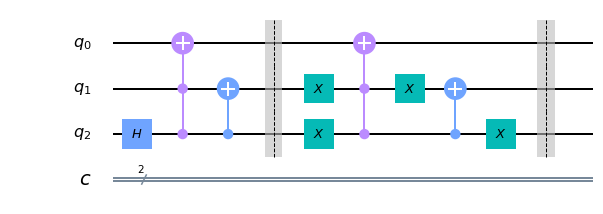

In [3]:
circ1.draw()

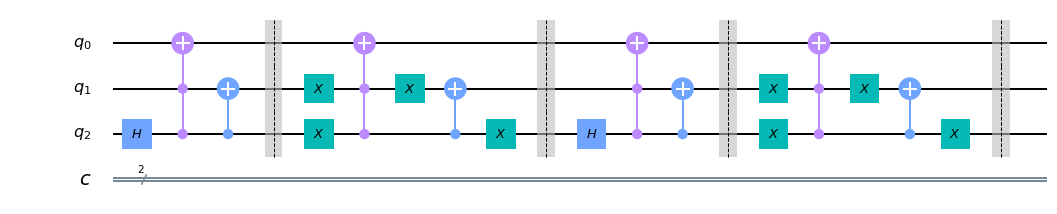

In [4]:
circ2.draw()

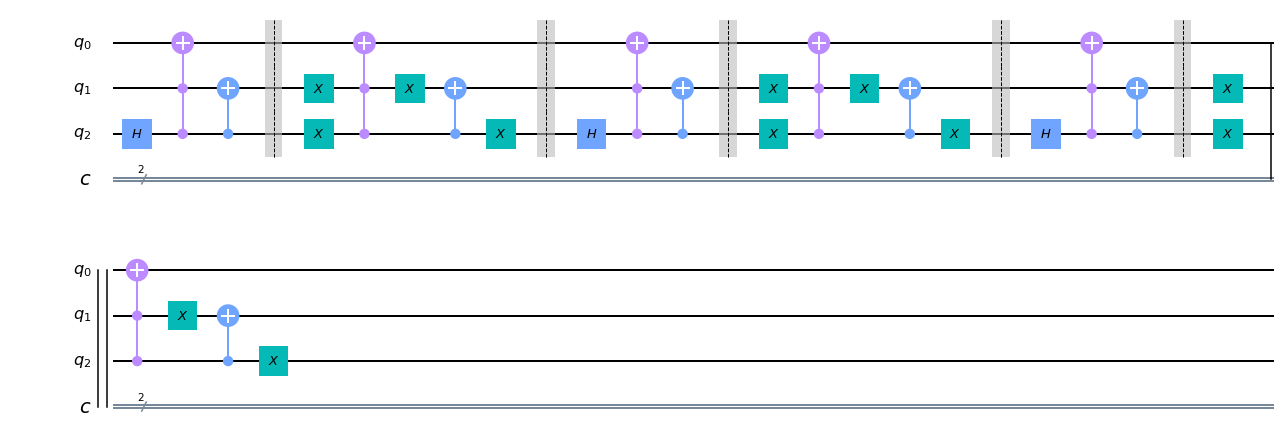

In [5]:
circ3.draw()

Na powyższych układach monetę reprezentuje qbit q2

In [6]:
#first step
job_sim = execute(circ1, backend)
sim_result = job_sim.result()
outputstate = sim_result.get_statevector(circ1, decimals=3)
print(outputstate)

[0.   +0.j 0.   +0.j 0.   +0.j 0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j
 0.   +0.j]


Prawdopodobieństwo (0.707)^2 = 0.5 otrzymujemy dla stanów |110> i |011> co po odrzuceniu qbitu monety czyli stanu na pozycji trzeciej daje prawdopodobieństwa P(|11>) = 0,5 i P(|01>) = 0,5
Wynik zgadza sie z obliczeniami. 

In [7]:
#second step
job_sim = execute(circ2, backend)
sim_result = job_sim.result()
outputstate = sim_result.get_statevector(circ2, decimals=3)
print(outputstate)

[ 0.5-0.j  0.5+0.j  0. +0.j  0. +0.j  0.5+0.j -0.5+0.j  0. +0.j  0. +0.j]


Prawdopodobieństwo (0.5)^2 = 0.25 lub (-0,5)^2 = 0,25 otrzymujemy dla stanów |100>, |001>, |000> i |101> co po odrzuceniu qbitu monety daje prawdopodobieństwa P(|10>) = 0,25+0,25 = 0,5 i P(|00>) = 0,25+0,25 = 0,5
Wynik zgadza sie z obliczeniami. 

In [8]:
#third step
job_sim = execute(circ3, backend)
sim_result = job_sim.result()
outputstate = sim_result.get_statevector(circ3, decimals=3)
print(outputstate)

[ 0.   +0.j  0.   +0.j  0.   +0.j  0.707-0.j  0.   +0.j  0.   +0.j
 -0.   +0.j  0.707-0.j]


Prawdopodobieństwo (0.707)^2 = 0.5 otrzymujemy dla stanów |110> i |111> co po odrzuceniu qbitu monety czyli stanu na pozycji trzeciej daje prawdopodobieństwa P(|11>) = 0,5 + 0,5 = 1
Wynik zgadza sie z obliczeniami.

# ZAD 2

In [9]:
circ1 = QuantumCircuit(3,2)
circ2 = QuantumCircuit(3,2)
circ3 = QuantumCircuit(3,2)

circ1.h(2)
#inc
circ1.ccx(2,1,0)
circ1.cx(2,1)
circ1.barrier()
#dec
circ1.x(1)
circ1.x(2)
circ1.ccx(2,1,0)
circ1.x(1)
circ1.cx(2,1)
circ1.x(2)
circ1.barrier()
circ1.measure([0,1], [0,1])

#step 2
circ2.h(2)
#inc
circ2.ccx(2,1,0)
circ2.cx(2,1)
circ2.barrier()
#dec
circ2.x(1)
circ2.x(2)
circ2.ccx(2,1,0)
circ2.x(1)
circ2.cx(2,1)
circ2.x(2)
circ2.barrier()

circ2.h(2)
#inc
circ2.ccx(2,1,0)
circ2.cx(2,1)
circ2.barrier()
#dec
circ2.x(1)
circ2.x(2)
circ2.ccx(2,1,0)
circ2.x(1)
circ2.cx(2,1)
circ2.x(2)
circ2.barrier()
circ2.measure([0,1], [0,1])

#step 3
circ3.h(2)
#inc
circ3.ccx(2,1,0)
circ3.cx(2,1)
circ3.barrier()
#dec
circ3.x(1)
circ3.x(2)
circ3.ccx(2,1,0)
circ3.x(1)
circ3.cx(2,1)
circ3.x(2)
circ3.barrier()

circ3.h(2)
#inc
circ3.ccx(2,1,0)
circ3.cx(2,1)
circ3.barrier()
#dec
circ3.x(1)
circ3.x(2)
circ3.ccx(2,1,0)
circ3.x(1)
circ3.cx(2,1)
circ3.x(2)
circ3.barrier()

circ3.h(2)
#inc
circ3.ccx(2,1,0)
circ3.cx(2,1)
circ3.barrier()
#dec
circ3.x(1)
circ3.x(2)
circ3.ccx(2,1,0)
circ3.x(1)
circ3.cx(2,1)
circ3.x(2)
circ3.measure([0,1], [0,1])

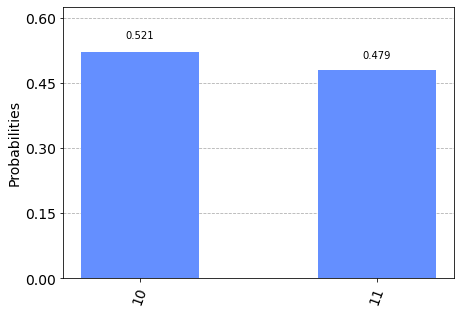

In [10]:
job = execute(circ1, backendQASM)
result = job.result()
counts = result.get_counts(circ1)
plot_histogram(counts)
#Krok pierwszy - symulator

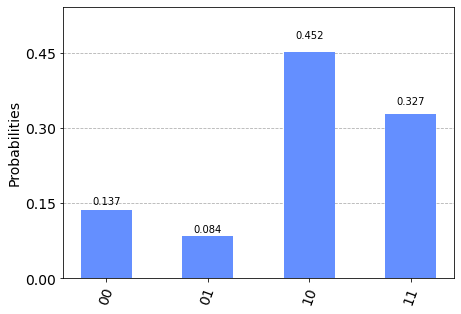

In [13]:
job = execute(circ1, backendREAL)
result = job.result()
counts = result.get_counts(circ1)
plot_histogram(counts)
#Krok pierwszy - komputer rzeczywisty

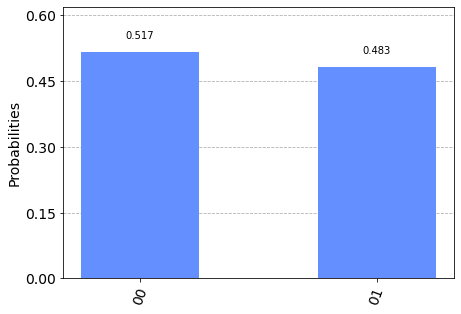

In [11]:
job = execute(circ2, backendQASM)
result = job.result()
counts = result.get_counts(circ2)
plot_histogram(counts)
#Krok drugi - symulator

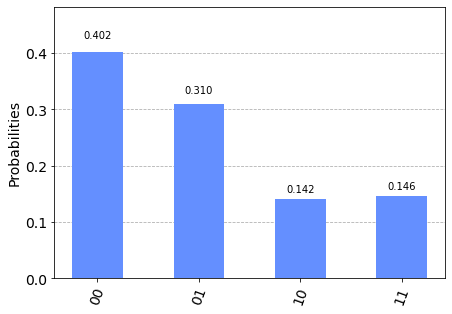

In [14]:
job = execute(circ2, backendREAL)
result = job.result()
counts = result.get_counts(circ2)
plot_histogram(counts)
#Krok drugi - komputer rzeczywisty

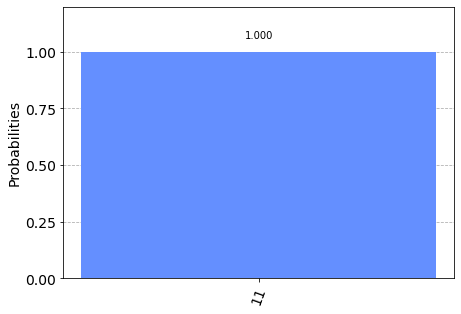

In [12]:
job = execute(circ3, backendQASM)
result = job.result()
counts = result.get_counts(circ3)
plot_histogram(counts)
#Krok trzeci - symulator

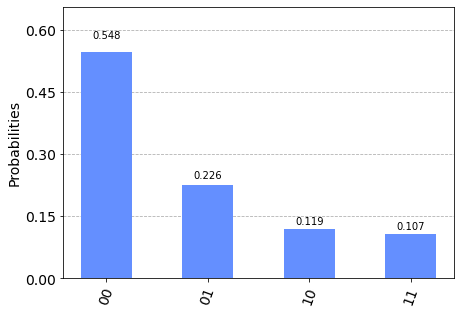

In [15]:
job = execute(circ2, backendREAL)
result = job.result()
counts = result.get_counts(circ2)
plot_histogram(counts)
#Krok trzeci - komputer rzeczywisty

Wyniki na symulatorze i komputerze realnym odniegają od siebie. Komputery reaklne obarczone są błędami przez co mogą pojawić się wyniki, które nie występują na symulatorach.
Prawdopodobieństwo dwóch poprawnych wydarzeń nie jest równoliczne.